# Formato DICOM

*Digital Imaging and Communications in Medicine*

Estándar internacional para transmitir, almacenar, recuperar, imprimir, procesar y visualizar información de imágenes médicas

Integra distintos formatos resultantes de dispositivos de adquisición de imágenes

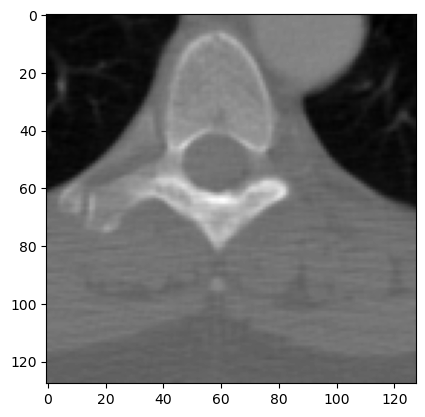

In [1]:
import os

import matplotlib.pyplot as plt
from pydicom import examples

ds = examples.ct
plt.imshow(ds.pixel_array, cmap=plt.gray())

## Formato

Datos de un archivo DICOM (.dcm)

In [2]:
from pydicom import dcmread

# INbreast dataset, used for learning purposes
dicom_path = 'inbreast2012/versions/1/INbreast Release 1.0/AllDICOMs/'

ds = dcmread(dicom_path + '20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm')
ds.file_meta

(0002,0000) File Meta Information Group Length  UL: 208
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.0.100.4.0
(0002,0013) Implementation Version Name         SH: 'MATLAB IPT 4.0'

In [3]:
print(f'Resolución: {ds.pixel_array.shape[0]}x{ds.pixel_array.shape[1]}')

Resolución: 4084x3328


In [4]:
import pandas as pd 

dicom_df = pd.read_csv('inbreast2012/versions/1/INbreast Release 1.0/INbreast.csv', delimiter=';')

dicom_df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads
0,removed,removed,R,CC,201001,22678622,4,1
1,removed,removed,L,CC,201001,22678646,4,3
2,removed,removed,R,MLO,201001,22678670,4,1
3,removed,removed,L,MLO,201001,22678694,4,3
4,removed,removed,R,CC,201001,22614074,2,5


In [5]:
print(dicom_df.shape)

(410, 8)


Las columnas `Patient ID` y `Patient age` son información removida debido a la protección de información, y no son necesarias para el procesamiento de imágenes de este estudio

In [6]:
dicom_df.drop(['Patient ID', 'Patient age'], axis=1, inplace=True)
dicom_df.head()

,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads
0,R,CC,201001,22678622,4,1
1,L,CC,201001,22678646,4,3
2,R,MLO,201001,22678670,4,1
3,L,MLO,201001,22678694,4,3
4,R,CC,201001,22614074,2,5


## Visualización

In [16]:
healthy = dicom_df[dicom_df['Bi-Rads'] == '1']
sample = healthy.sample()['File Name'].iloc[0].astype(str)

In [17]:
def list_patient_dcm(name, path):
    file = [dcm for dcm in os.listdir(path) \
            if os.path.isfile(os.path.join(path, dcm)) and name in dcm]

    patient_id = file[0].split('_')[1]

    return [dcm for dcm in os.listdir(path) \
            if os.path.isfile(os.path.join(path, dcm)) and patient_id in dcm]

a = list_patient_dcm(sample, dicom_path)
a


['53586361_dda3c6969a34ff8e_MG_L_ML_ANON.dcm',
 '53586388_dda3c6969a34ff8e_MG_R_ML_ANON.dcm',
 '53586415_dda3c6969a34ff8e_MG_L_CC_ANON.dcm',
 '53586442_dda3c6969a34ff8e_MG_R_CC_ANON.dcm']

In [18]:
# TODO
# for img in a:
#     list_dcm = []
#     list_dcm.append(dcmread())
# 
# plt.subplots((2, 2), figsize=(8, 8))
# 
# plt.imshow(ds.pixel_array, cmap=plt.gray())